![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

# 0. Import the data and python libraries

In [107]:
# Start your code here!
import pandas as pd

In [108]:
# import the data
women_results = pd.read_csv('women_results.csv', index_col=0)
print(women_results.shape)
women_results.head()

(4884, 6)


,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [109]:
men_results = pd.read_csv('men_results.csv', index_col=0)
print(men_results.shape)
men_results.head()

(44353, 6)


,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [110]:
women_results["genre"] = 'w'
men_results["genre"] = 'm'
data = pd.concat([women_results,men_results]).reset_index(drop=True)
print(data.shape)
data.head()

(49237, 7)


,date,home_team,away_team,home_score,away_score,tournament,genre
0,1969-11-01,Italy,France,1,0,Euro,w
1,1969-11-01,Denmark,England,4,3,Euro,w
2,1969-11-02,England,France,2,0,Euro,w
3,1969-11-02,Italy,Denmark,3,1,Euro,w
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,w


# 1. Exploring Dataset

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49237 entries, 0 to 49236
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        49237 non-null  object
 1   home_team   49237 non-null  object
 2   away_team   49237 non-null  object
 3   home_score  49237 non-null  int64 
 4   away_score  49237 non-null  int64 
 5   tournament  49237 non-null  object
 6   genre       49237 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.6+ MB


In [112]:
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49237 entries, 0 to 49236
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        49237 non-null  datetime64[ns]
 1   home_team   49237 non-null  object        
 2   away_team   49237 non-null  object        
 3   home_score  49237 non-null  int64         
 4   away_score  49237 non-null  int64         
 5   tournament  49237 non-null  object        
 6   genre       49237 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.6+ MB


## 1.1 Filtering data

In [117]:
filtering = (data["tournament"] == 'FIFA World Cup') & (data["date"]>='2002-01-01')
data_filtered = data[filtering]
print(data_filtered.shape)
data_filtered.sort_values(by='date').head()

(584, 7)


,date,home_team,away_team,home_score,away_score,tournament,genre
30048,2002-05-31,France,Senegal,0,1,FIFA World Cup,m
30051,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,m
30049,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,m
30050,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,m
30055,2002-06-02,Spain,Slovenia,3,1,FIFA World Cup,m


In [126]:
data_filtered.loc[:,"goals"] = data_filtered[["home_score","away_score"]].sum(axis=1).values
data_filtered.head()

,date,home_team,away_team,home_score,away_score,tournament,genre,goals
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,w,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,w,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,w,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,w,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,w,4


# 2.Choosing the correct hypothesis test

Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.
To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.

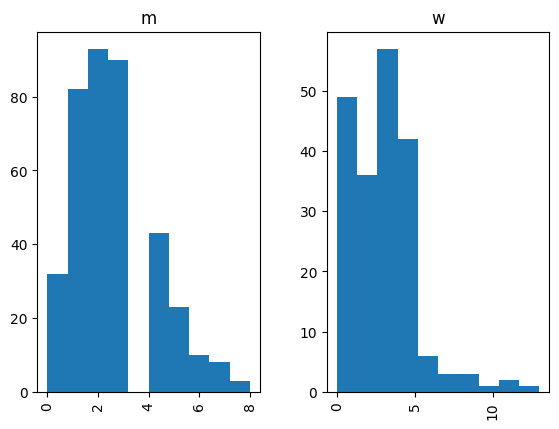

In [128]:
#Determining if the data is normally distributed
data_filtered.hist(by='genre', column='goals');

Samples are not normally distributed. 
Non-parametric tests are more reliable than parametric tests for small sample sizes and
when data isn't normally distributed.

# 3.Wilcoxon-Mann-Whitney test

In [131]:
import pingouin

In [136]:
alpha=0.01 

mwu_test = pingouin.mwu(x=data_filtered[data_filtered['genre'] == 'w']['goals'],  
             y=data_filtered[data_filtered['genre'] == 'm']['goals'], 
             alternative='greater') 
mwu_test

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [137]:
p_val = mwu_test["p-val"].values[0]

In [141]:
if p_val <= alpha:
    result = 'reject'
else:
    result = 'failed to reject null hypothesis'
print(result)

reject


In [143]:
result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}